In [1]:
%cd ../../../..

/home/majed_alshaibani/Experiments/DotlessArabic


In [39]:
import os
import json
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

In [3]:
base_results_path = "dotless_arabic/experiments/nlms/results"
results_dict = {}
for dataset_name in os.listdir(base_results_path):
    for tokenizer_class in os.listdir(f'{base_results_path}/{dataset_name}'):
        for results_file in os.listdir(f"{base_results_path}/{dataset_name}/{tokenizer_class}"):
            if not os.path.isfile(f"{base_results_path}/{dataset_name}/{tokenizer_class}/{results_file}"):
                continue
            with open(f"{base_results_path}/{dataset_name}/{tokenizer_class}/{results_file}") as results:
                text_type = results_file.split(".")[0].split("_")[0]
                content = results.read()
                considered_vocab = ''
                all_vocab = ''
                sequence_length = ''
                training_ppl = ''
                ppl = ''
                training_time = ''
                params = ''
                model_size = ''
                for line in content.splitlines():
                    if line.startswith('Considered Vocab:'):
                        considered_vocab = line.split(':')[-1].strip()
                    elif line.startswith('All Vocab:'):
                        all_vocab = line.split(':')[-1].strip()
                    elif line.startswith('Sequence Length:'):
                        sequence_length = line.split(':')[-1].strip()
                    elif line.startswith('Training Perplexity:'):
                        training_ppl = line.split(':')[-1].strip()
                    elif line.startswith('Perplexity with OOVs:'):
                        ppl = line.split(':')[-1].strip()
                    elif line.startswith('Training Time:'):
                        training_time = line.split(':')[-1].strip()
                    elif 'Total params' in line:
                        params = ' '.join(line.split()[:2])
                    elif 'Total estimated model params size (MB)' in line:
                        model_size = line.split(' ')[0]
                    
                if not results_dict.get(tokenizer_class):
                    results_dict[tokenizer_class] = {}
                if not results_dict[tokenizer_class].get(dataset_name):
                    results_dict[tokenizer_class][dataset_name] = {}
                results_dict[tokenizer_class][dataset_name].update(
                    {
                        text_type: {
                            'considered_vocab':considered_vocab,
                            'all_vocab':all_vocab,
                            'sequence_length':sequence_length,
                            'training_ppl':training_ppl,
                            'ppl':ppl,
                            'training_time':training_time,
                            'params':params,
                            'model_size':model_size,
                        }
                    }
                )
pprint(results_dict.keys())

dict_keys(['DisjointLetterTokenizer', 'CharacterTokenizer', 'FarasaMorphologicalTokenizer', 'WordTokenizer'])


In [4]:
datasets_names = [
    "quran_dataset",
    "sanadset_hadeeth_dataset",
    "poems_dataset",
    "news_dataset",
    "wikipedia_dataset",
]
for tokenizer_class in sorted(results_dict.keys(), reverse=True):
    for dataset_name in datasets_names:
        for text_type in sorted(results_dict[tokenizer_class][dataset_name]):
            result = results_dict[tokenizer_class][dataset_name][text_type]
            print(
                f'{tokenizer_class.replace("Tokenizer","")},',
                f'{dataset_name.replace("_dataset","")},',
                f"{text_type}:\n",
                '\n',
                f'V: {result["all_vocab"]}\n',
                f'V_: {result["considered_vocab"]}\n',
                f'(V_/V): {float(result["considered_vocab"].replace(",",""))/float(result["all_vocab"].replace(",","")):.2f}\n',
                f'PPL: {float(result["ppl"]) if result["ppl"] else -1:.2f}\n',
            )
            if text_type.startswith('un'):
                dotted_ppl = 0
                undotted_ppl = 0
                if results_dict[tokenizer_class][dataset_name]['dotted']['ppl']:
                    dotted_ppl = float(results_dict[tokenizer_class][dataset_name]['dotted']['ppl'])
                if results_dict[tokenizer_class][dataset_name]['undotted']['ppl']:
                    undotted_ppl = float(results_dict[tokenizer_class][dataset_name]['undotted']['ppl'])
                if dotted_ppl and undotted_ppl:
                    print('undotted/dotted PPL raio:',f'{undotted_ppl/dotted_ppl:.2f}')
                else:
                    print('N/A')
                print('-'*80)
    print("-" * 120)

Word, quran, dotted:
 
 V: 13,435
 V_: 10,112
 (V_/V): 0.75
 PPL: 267.84

Word, quran, undotted:
 
 V: 12,774
 V_: 9,451
 (V_/V): 0.74
 PPL: 274.85

undotted/dotted PPL raio: 1.03
--------------------------------------------------------------------------------
Word, sanadset_hadeeth, dotted:
 
 V: 299,162
 V_: 34,931
 (V_/V): 0.12
 PPL: 33.32

Word, sanadset_hadeeth, undotted:
 
 V: 240,518
 V_: 26,905
 (V_/V): 0.11
 PPL: 40.16

undotted/dotted PPL raio: 1.21
--------------------------------------------------------------------------------
Word, poems, dotted:
 
 V: 880,592
 V_: 216,253
 (V_/V): 0.25
 PPL: 2441.38

Word, poems, undotted:
 
 V: 628,842
 V_: 130,152
 (V_/V): 0.21
 PPL: 2286.09

undotted/dotted PPL raio: 0.94
--------------------------------------------------------------------------------
Word, news, dotted:
 
 V: 837,890
 V_: 62,266
 (V_/V): 0.07
 PPL: 148.06

Word, news, undotted:
 
 V: 686,651
 V_: 51,614
 (V_/V): 0.08
 PPL: 152.77

undotted/dotted PPL raio: 1.03
------

In [5]:
for tokenizer_class in sorted(results_dict.keys(), reverse=True):
    for dataset_name in datasets_names:
        for text_type in sorted(results_dict[tokenizer_class][dataset_name]):
            result = results_dict[tokenizer_class][dataset_name][text_type]
            print(tokenizer_class,dataset_name,text_type)
            print(result['training_time'])
        print('-'*120)

WordTokenizer quran_dataset dotted
296.31 seconds
WordTokenizer quran_dataset undotted
371.32 seconds
------------------------------------------------------------------------------------------------------------------------
WordTokenizer sanadset_hadeeth_dataset dotted
54780.78 seconds
WordTokenizer sanadset_hadeeth_dataset undotted
47085.27 seconds
------------------------------------------------------------------------------------------------------------------------
WordTokenizer poems_dataset dotted
159723.74 seconds
WordTokenizer poems_dataset undotted
92463.53 seconds
------------------------------------------------------------------------------------------------------------------------
WordTokenizer news_dataset dotted
482794.75 seconds
WordTokenizer news_dataset undotted
452536.51 seconds
------------------------------------------------------------------------------------------------------------------------
WordTokenizer wikipedia_dataset dotted
222757.18 seconds
WordTokenizer wi

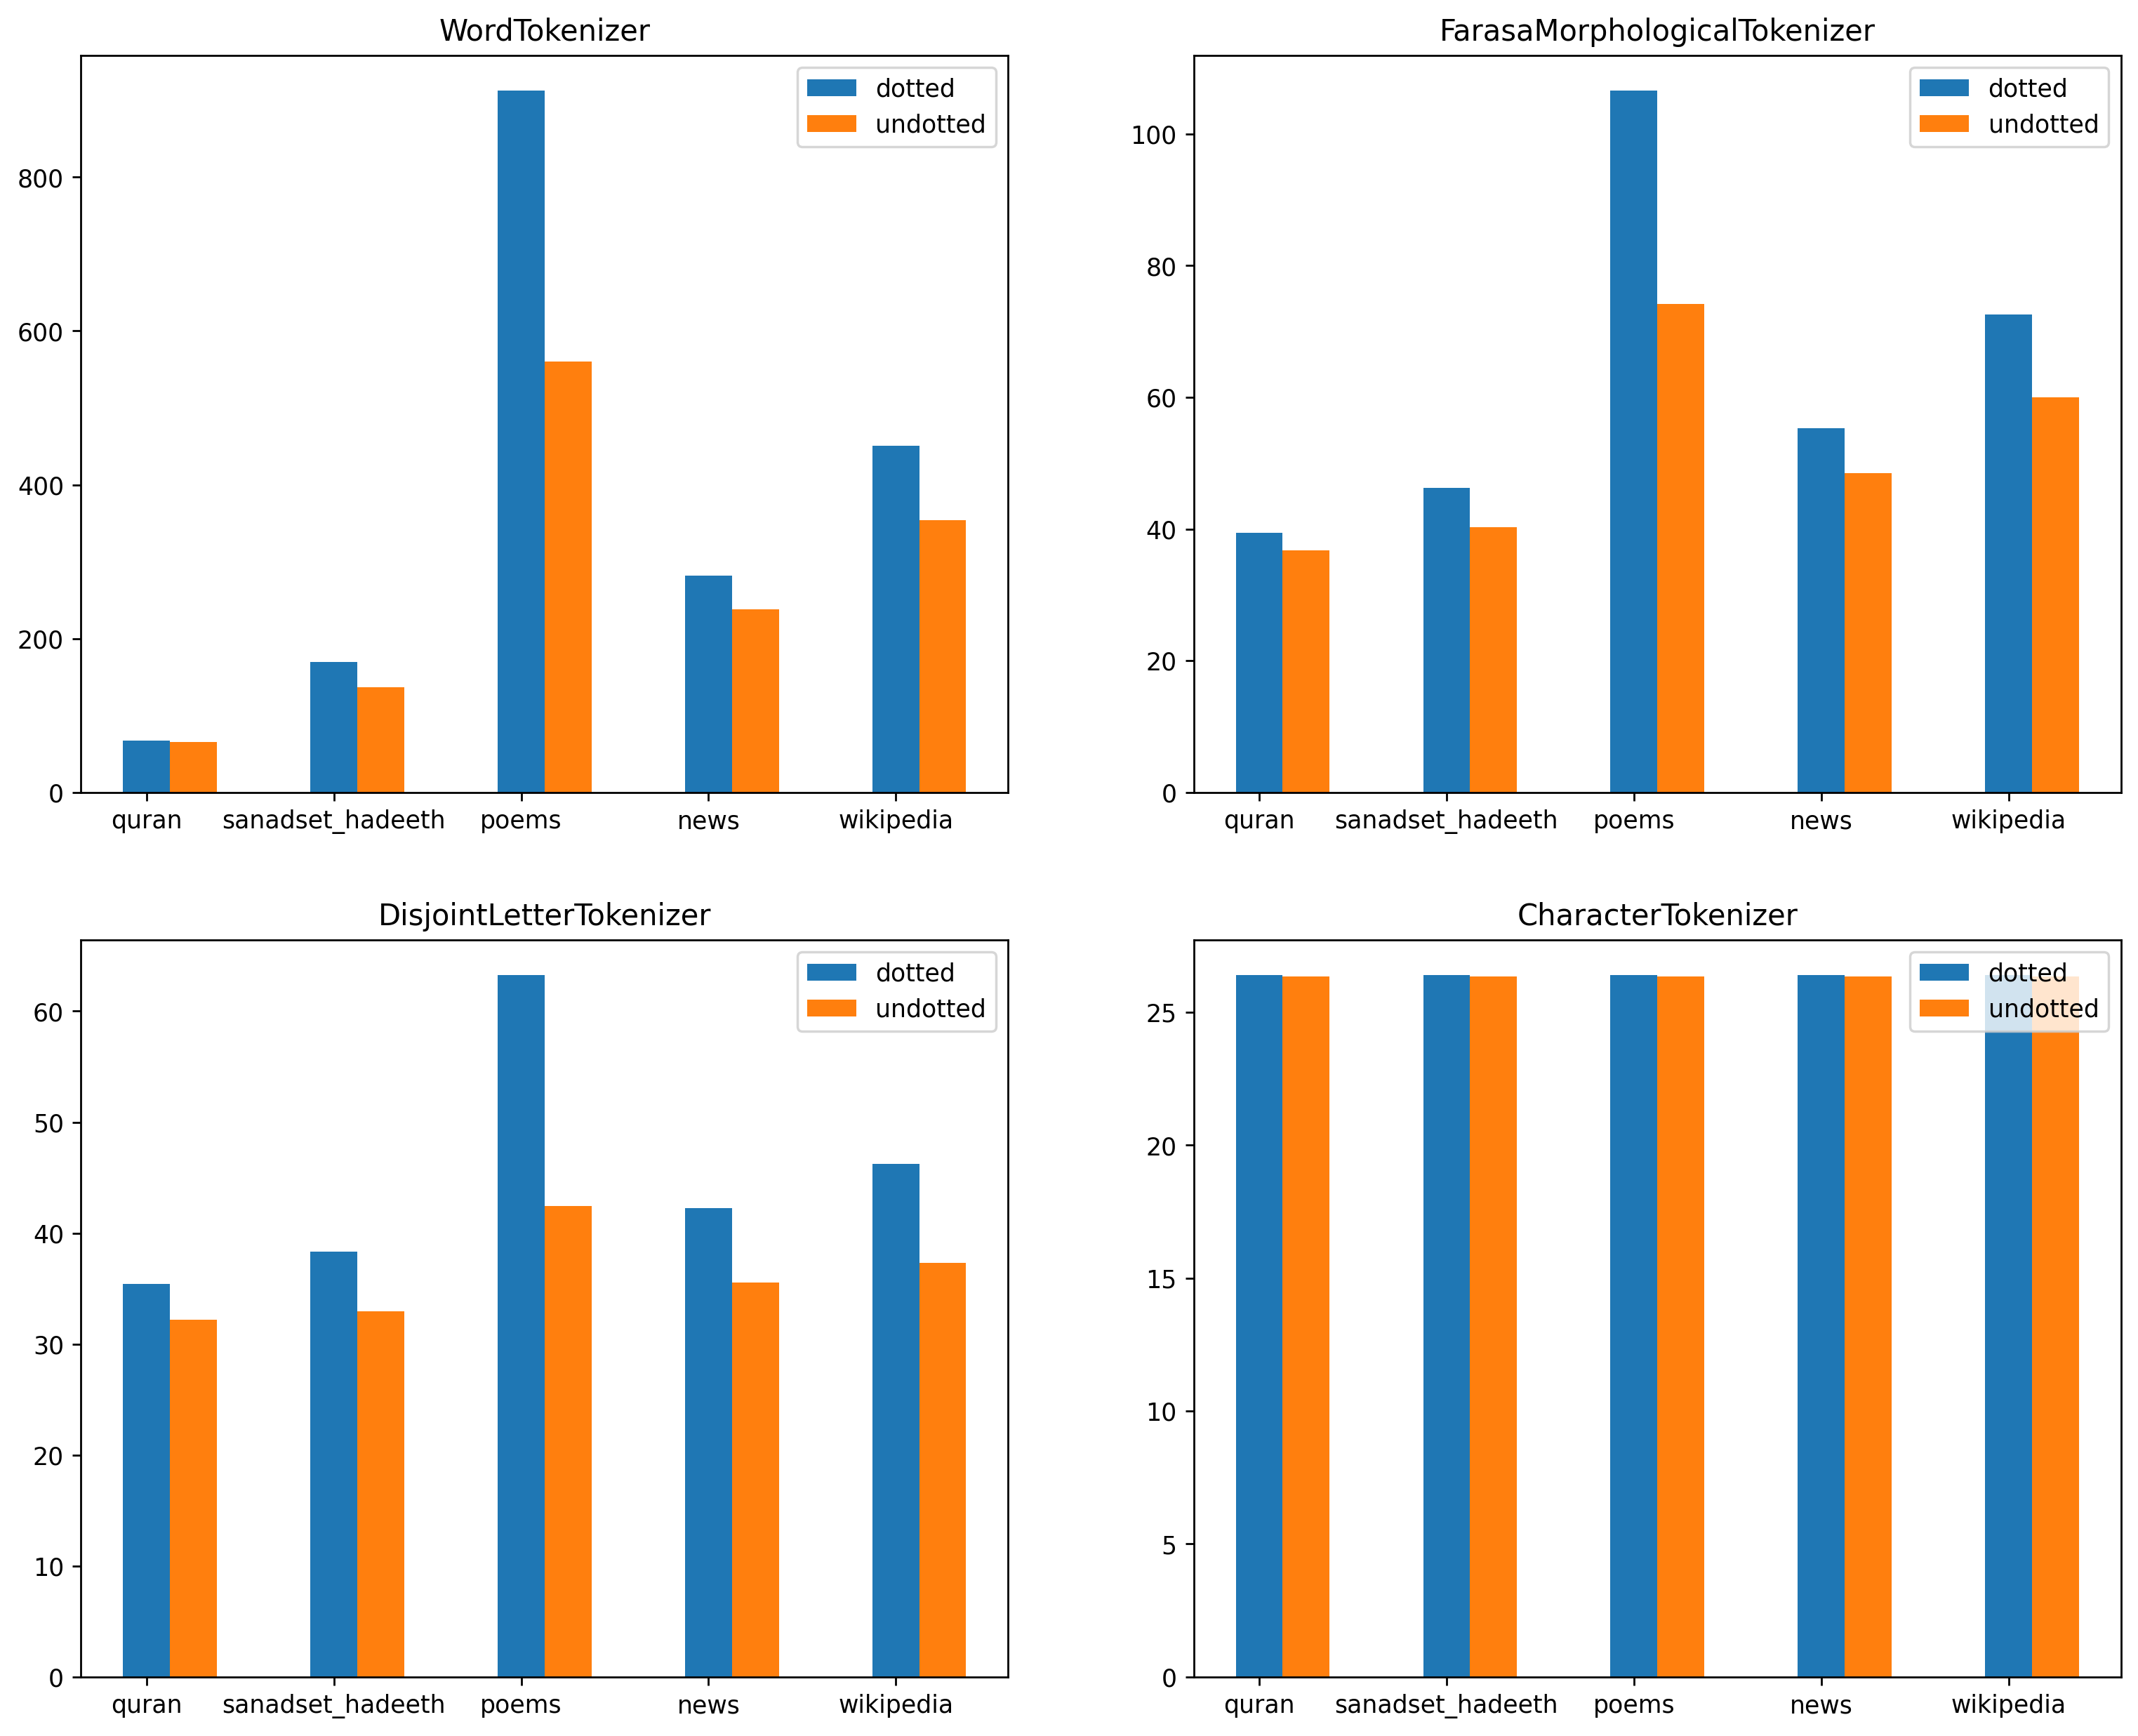

In [58]:
figure,axis = plt.subplots(nrows=2,ncols=2,dpi=250,figsize=(15,12))

metric = 'model_size'

for tokenizer_index,tokenizer_class in enumerate(sorted(results_dict.keys(), reverse=True)):

    dotted_sizes = list()
    undotted_sizes = list()
    for dataset_name in datasets_names:
        dotted_sizes.append(results_dict[tokenizer_class][dataset_name]['dotted'][metric])
        undotted_sizes.append(results_dict[tokenizer_class][dataset_name]['undotted'][metric])

    names = list(map(lambda name: name.replace('_dataset',''),datasets_names))

    dotted_sizes = list(map(lambda item:float(item.split(' ')[0]),dotted_sizes))
    undotted_sizes = list(map(lambda item:float(item.split(' ')[0]),undotted_sizes))

    # dotted_sizes = list(map(float,dotted_sizes))
    # undotted_sizes = list(map(float,undotted_sizes))
    axis[tokenizer_index//2,tokenizer_index%2].set_title(tokenizer_class)
    axis[tokenizer_index//2,tokenizer_index%2].bar(names,dotted_sizes,width=0.25, label='dotted')
    axis[tokenizer_index//2,tokenizer_index%2].bar(np.arange(len(names))+0.25,undotted_sizes,width=0.25,label='undotted')
    axis[tokenizer_index//2,tokenizer_index%2].legend()